# Nikolay Shivarov Homework 5

Here are the links for the data that I am going to use
happiness:
https://ourworldindata.org/grapher/happiness-cantril-ladder?time=2020&country=~IRN
corruption:
https://ourworldindata.org/grapher/political-corruption-index
trust:
https://ourworldindata.org/grapher/share-who-trust-government?tab=chart
    

In [20]:
import pandas as pd
import numpy 
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [21]:
corruption = pd.read_csv("corruption.csv")
trust = pd.read_csv("trust.csv")
happiness = pd.read_csv("happiness.csv")

Here I am going to clear the data, I only need the data for 2020. Then I merge each pair so I can make a scatter plot and find the correlation coefficient,

In [22]:
corruption_2020 = corruption.loc[corruption["Year"] == 2020, ["Entity", "coef"]]
corruption_2020.describe()
happiness_2020 = happiness.loc[happiness["Year"] == 2020, ["Entity", "Score"]]
happiness_2020.describe()
trust_2020 = trust[["Entity", "Trust"]]
trust_corruption = pd.merge(trust_2020, corruption_2020, on="Entity")
trust_happiness = pd.merge(trust_2020, happiness_2020, on="Entity")
happiness_corruption = pd.merge(happiness_2020, corruption_2020, on="Entity")

Correlation Coefficient: -0.24978238753837967


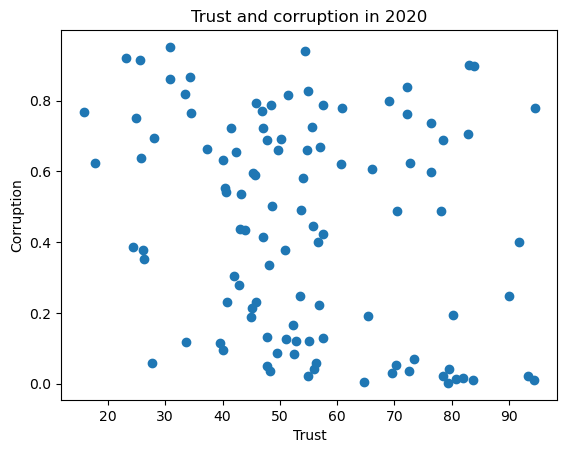

In [23]:
plt.scatter(trust_corruption["Trust"], trust_corruption["coef"])
plt.title("Trust and corruption in 2020")
plt.xlabel("Trust")
plt.ylabel("Corruption")
correlation_coefficient1 = trust_corruption["Trust"].corr(trust_corruption["coef"])
print(f"Correlation Coefficient: {correlation_coefficient1}")

We can see that trust and corruption are not strongly related, there are points everywhere. The correlation shows that less corruption has a positive effect on the trust, but the effect is not strong enough. 

Correlation Coefficient: 0.20861084850094028


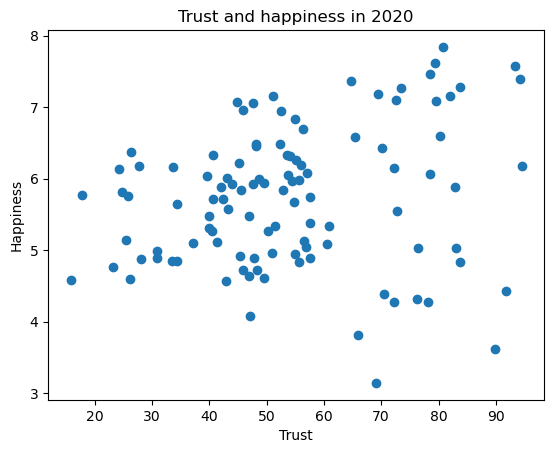

In [24]:
plt.scatter(trust_happiness["Trust"], trust_happiness["Score"])
plt.title("Trust and happiness in 2020")
plt.xlabel("Trust")
plt.ylabel("Happiness")
correlation_coefficient2 = trust_happiness["Trust"].corr(trust_happiness["Score"])
print(f"Correlation Coefficient: {correlation_coefficient2}")

There are points almost everywhere, except the top left and bottom left corners, the countries with least trust have usually have close to average happiness. The correlation is similar to the previous case. On average the people in the happier countries are a bit more trustful, but there are some points in the bottom right corner. 

Correlation Coefficient: -0.6117542981772576


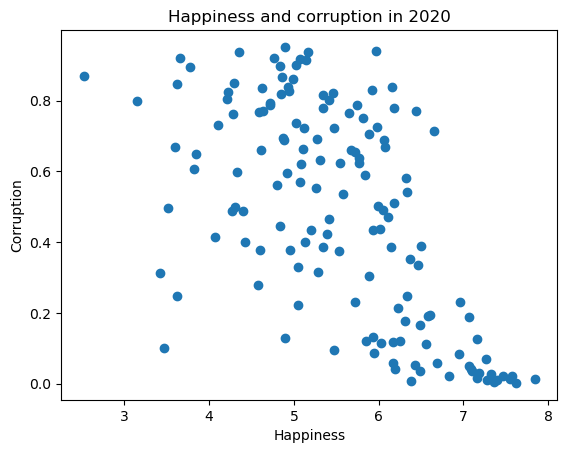

In [25]:
plt.scatter(happiness_corruption["Score"], happiness_corruption["coef"])
plt.title("Happiness and corruption in 2020")
plt.xlabel("Happiness")
plt.ylabel("Corruption")
correlation_coefficient3 = happiness_corruption['Score'].corr(happiness_corruption['coef'])
print(f"Correlation Coefficient: {correlation_coefficient3}")

Here we can see that there are no points in the upper right and bottom left corner. Only by looking in the points we can imagime a line going from the top left to bottom right corner. There are a lot of points in the bottom right corner and no points that are close to the right side of the square and distanced to the bottom side, we can conclude that if the people are very happy the corruption is rare. The correlation also shows, that the two things are strongly related, but not in every country. There are 3 points with less than 4 happiness and less than 0.4 corruption.

# Volcanoes

This is the query which I used to get the information:
SELECT ?volcano ?volcanoLabel ?latitude ?longitude
WHERE 
{
  ?volcano wdt:P31 wd:Q8072.
  ?volcano wdt:P625 ?coord.
  ?coordinate ps:P625 ?coord.
  ?coordinate psv:P625 ?coordinate_node.
  ?coordinate_node wikibase:geoLongitude ?longitude.
  ?coordinate_node wikibase:geoLatitude ?latitude.
  
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
   
}


In [26]:
volcanoes =  pd.read_csv("volcanoes.csv")

We know that there are 7 large major plates, 8 minor plates, and some very small microplates that make up the lithosphere of Earth. So I am going to do KMeans with 7 clusters and then KMeans with 15 clusters.  

Text(0, 0.5, 'longitude')

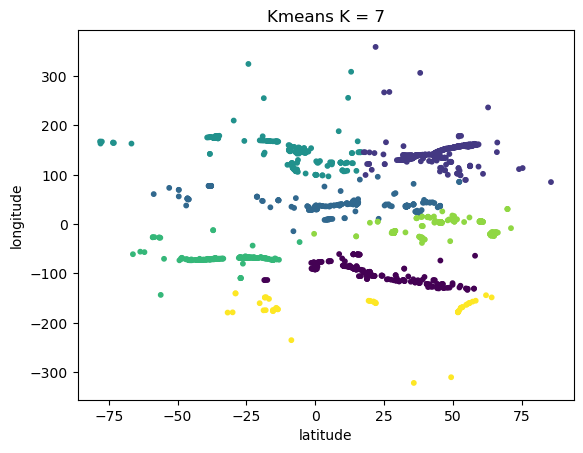

In [27]:
kmeans = KMeans(n_clusters=7, n_init=10, random_state=0)
clusters = kmeans.fit_predict(volcanoes[["latitude", "longitude"]])
plt.scatter(volcanoes["latitude"], volcanoes["longitude"], c=clusters, cmap="viridis", s = 10)
plt.title("Kmeans K = 7")
plt.xlabel("latitude")
plt.ylabel("longitude")

We can see that a lot of the clusters form a line. This is because most of the world's volcanoes are found around the edges of tectonic plates, both on land and in the oceans.

Text(0, 0.5, 'longitude')

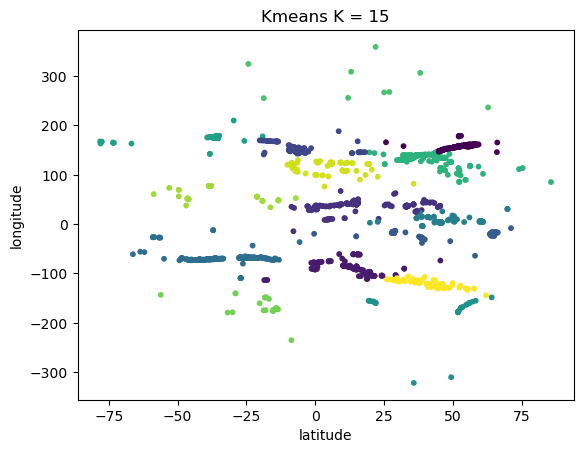

In [28]:
kmeans = KMeans(n_clusters=15, n_init=10, random_state=0)
clusters = kmeans.fit_predict(volcanoes[["latitude", "longitude"]])
plt.scatter(volcanoes["latitude"], volcanoes["longitude"], c=clusters, cmap="viridis", s = 10)
plt.title("Kmeans K = 15")
plt.xlabel("latitude")
plt.ylabel("longitude")

The Kmeans with 15 clusters did not work well let's try with 10 clusters

Text(0, 0.5, 'longitude')

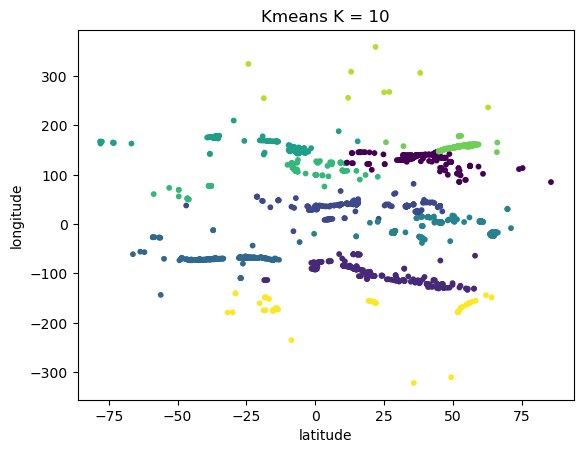

In [29]:
kmeans = KMeans(n_clusters=10, n_init=10, random_state=0)
clusters = kmeans.fit_predict(volcanoes[["latitude", "longitude"]])
plt.scatter(volcanoes["latitude"], volcanoes["longitude"], c=clusters, cmap="viridis", s = 10)
plt.title("Kmeans K = 10")
plt.xlabel("latitude")
plt.ylabel("longitude")

Let's try with less clusters

Text(0, 0.5, 'longitude')

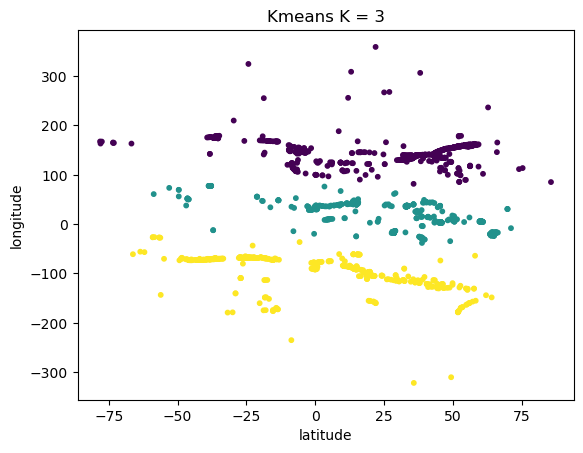

In [30]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
clusters = kmeans.fit_predict(volcanoes[["latitude", "longitude"]])
plt.scatter(volcanoes["latitude"], volcanoes["longitude"], c=clusters, cmap="viridis", s = 10)
plt.title("Kmeans K = 3")
plt.xlabel("latitude")
plt.ylabel("longitude")

These clusters look like 3 lines with some outliers. We know that there are a lot of volcanoes in the border between the american continents and the Pacific ocean. The second region is South Europe and North Africa. And the third is the border between Asia and the Pacific ocean and Oceania. 